This is the computational notebook for Casey A'Hearn's final project, "Single Ladies in the Mormon Mexican Colonies".

Our research question is as follows: How many single women are there in the 1898-1903 census of the Mormon Colonies of Mexico? Along the way, we are going to be visualizing our data in pie charts to look at the porportions of labeled males versus females and married females verses single females.

Begin by importing necessary libraries and .csv files created from the census data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Read CSV files
url_chu = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/chuichupa.csv'
df_chu = pd.read_csv(url_chu, index_col=0)
url_diaz = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/diaz.csv'
df_diaz = pd.read_csv(url_diaz, index_col=0)
url_dublan = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/dublan.csv'
df_dublan = pd.read_csv(url_dublan, index_col=0)
url_gar = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/garcia.csv'
df_gar = pd.read_csv(url_gar, index_col=0)
url_gua = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/guadaloupe.csv'
df_gua = pd.read_csv(url_gua, index_col=0)
url_juarez = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/juarez.csv'
df_juarez = pd.read_csv(url_juarez, index_col=0)
url_pa = 'https://raw.githubusercontent.com/caseylogana0122/DHProject/refs/heads/main/pancheco.csv'
df_pa = pd.read_csv(url_pa, index_col=0)  

Next, we are going to load equations to calculate how many men and woman are labeled throughout the colonies. They are long. They are ugly. But they work. For each dataframe, we look at the 'sex_indicated' column, make the contents lowercased (to ensure consistency) and sum up the number of times the criteria 'female' or 'male' is fulfilled!

In [2]:
female_count = (df_pa['sex_indicated'].str.lower().value_counts().get('female', 0) + df_chu['sex_indicated'].str.lower().value_counts().get('female', 0) + df_diaz['sex_indicated'].str.lower().value_counts().get('female', 0) + df_dublan['sex_indicated'].str.lower().value_counts().get('female', 0) + df_gar['sex_indicated'].str.lower().value_counts().get('female', 0) + df_gua['sex_indicated'].str.lower().value_counts().get('female', 0) + df_juarez['sex_indicated'].str.lower().value_counts().get('female', 0))
print(female_count)

male_count = (df_pa['sex_indicated'].str.lower().value_counts().get('male', 0) + df_chu['sex_indicated'].str.lower().value_counts().get('male', 0) + df_diaz['sex_indicated'].str.lower().value_counts().get('male', 0) + df_dublan['sex_indicated'].str.lower().value_counts().get('male', 0) + df_gar['sex_indicated'].str.lower().value_counts().get('male', 0) + df_gua['sex_indicated'].str.lower().value_counts().get('male', 0) + df_juarez['sex_indicated'].str.lower().value_counts().get('male', 0))
print(male_count)

1106
1054


Great! We are able to see that the total number of labeled females in the colonies total to 1106 individuals. Likewise, the total number of labeled males in the colonies total to 1054. 

To see the gender distribution another way, let's create a pie chart. We will be following https://www.w3schools.com/python/matplotlib_pie_charts.asp as a guide. Additionally, big thanks to this stack overflow thread about displaying percentages and totals in our pie chart: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct.

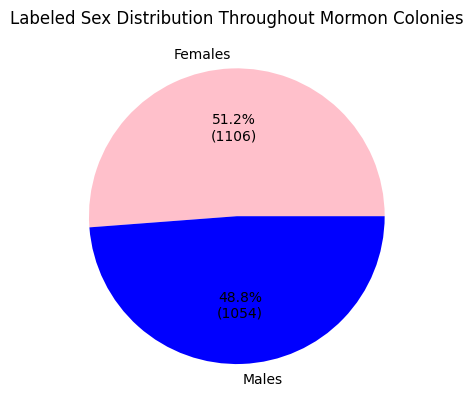

In [ ]:
y = np.array([female_count, male_count])
mylabels = ['Females', 'Males']
colors = ['pink', 'blue']

total = sum(y)
def autopct_format(pct):
    absolute = round(pct/100.*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.title("Labeled Sex Distribution Throughout Mormon Colonies")
plt.pie(y, labels=mylabels, colors=colors, autopct=autopct_format)
plt.show()

Yay! Our pie chart has been created. We can double-check to make sure the totals are the same... And they are!

The next step is going to get a little ugly - but code that works is code that works, in my opinion. 
We want to create a variable that is the sum of all the women throughout the colonies who have both 'female' and 'married' in their row. We will need this information for another pie chart. There are many ways to do this but just to be on the safe side, I decided to take it one colony at a time. Our dataframe does not have 'shape' to it, as it is only one layer, but we need to define it as 0 anyway - hence our .shape[0]. 

In [4]:
female_married_count = (
    (df_chu[
        (df_chu['sex_indicated'].str.lower() == 'female') &
        (df_chu['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_pa[
        (df_pa['sex_indicated'].str.lower() == 'female') &
        (df_pa['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_diaz[
        (df_diaz['sex_indicated'].str.lower() == 'female') &
        (df_diaz['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_dublan[
        (df_dublan['sex_indicated'].str.lower() == 'female') &
        (df_dublan['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_gar[
        (df_gar['sex_indicated'].str.lower() == 'female') &
        (df_gar['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_gua[
        (df_gua['sex_indicated'].str.lower() == 'female') &
        (df_gua['marriage_status'].str.lower() == 'married')
    ].shape[0]) +
    (df_juarez[
        (df_juarez['sex_indicated'].str.lower() == 'female') &
        (df_juarez['marriage_status'].str.lower() == 'married')
    ].shape[0])
)
print(female_married_count)

262


As you can see, we have 262 women who fit our critera - female & married. Now, we need to get our female & single data!

To keep things consistent, we are using the same base code but changing one variable: married to single. It it isn't broken, don't fix it.

In [5]:
female_single_count = (
    (df_chu[
        (df_chu['sex_indicated'].str.lower() == 'female') &
        (df_chu['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_pa[
        (df_pa['sex_indicated'].str.lower() == 'female') &
        (df_pa['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_diaz[
        (df_diaz['sex_indicated'].str.lower() == 'female') &
        (df_diaz['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_dublan[
        (df_dublan['sex_indicated'].str.lower() == 'female') &
        (df_dublan['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_gar[
        (df_gar['sex_indicated'].str.lower() == 'female') &
        (df_gar['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_gua[
        (df_gua['sex_indicated'].str.lower() == 'female') &
        (df_gua['marriage_status'].str.lower() == 'single')
    ].shape[0]) +
    (df_juarez[
        (df_juarez['sex_indicated'].str.lower() == 'female') &
        (df_juarez['marriage_status'].str.lower() == 'single')
    ].shape[0])
)
print(female_single_count)

125


Great! Now we have all of the necessary data for our labeled female datagroup. Time to make a pie!

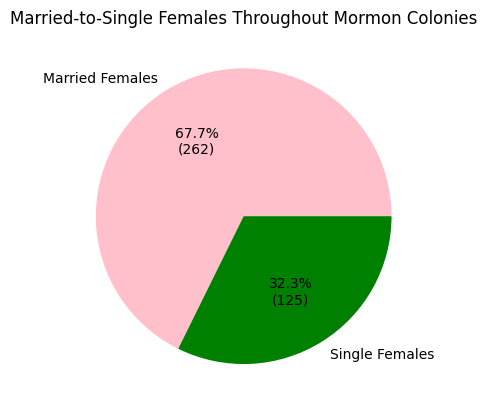

In [6]:
y = np.array([female_married_count, female_single_count])
mylabels = ['Married Females', 'Single Females',]
colors = ['pink', 'green']

total = sum(y)
def autopct_format(pct):
    absolute = round(pct/100.*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.title("Married-to-Single Females Throughout Mormon Colonies")
plt.pie(y, labels=mylabels, colors=colors, autopct=autopct_format)
plt.show()

Now that we have created that chart, we are going to generate a list of all 125 single females throughout the colonies.

In [7]:
df = single_females = pd.concat([
    df_chu[(df_chu['sex_indicated'].str.lower() == 'female') & (df_chu['marriage_status'].str.lower() == 'single')],
    df_pa[(df_pa['sex_indicated'].str.lower() == 'female') & (df_pa['marriage_status'].str.lower() == 'single')],
    df_diaz[(df_diaz['sex_indicated'].str.lower() == 'female') & (df_diaz['marriage_status'].str.lower() == 'single')],
    df_dublan[(df_dublan['sex_indicated'].str.lower() == 'female') & (df_dublan['marriage_status'].str.lower() == 'single')],
    df_gar[(df_gar['sex_indicated'].str.lower() == 'female') & (df_gar['marriage_status'].str.lower() == 'single')],
    df_gua[(df_gua['sex_indicated'].str.lower() == 'female') & (df_gua['marriage_status'].str.lower() == 'single')],
    df_juarez[(df_juarez['sex_indicated'].str.lower() == 'female') & (df_juarez['marriage_status'].str.lower() == 'single')]
])

# Display the list of single females
print(single_females)

         last_name first_name age nation_of_origin sex_indicated date_arrived  \
fam_ID                                                                          
5         Chestnut      Grace  26    E.U. of North        female      1894-10   
8            Hakes    Enrique  29    E.U. of North        female   1894-05-01   
13       Martineau   Berta M.  18    E.U. of North        female          NaN   
15         Russell    Sara E.  55    E.U. of North        female          NaN   
2            Black     Era M.  32    E.U. of North        female   1885-03-10   
...            ...        ...  ..              ...           ...          ...   
126       Woodbury     Ana M.  39    E.U. of North        female   1885-04-12   
127     Woodmansie     Gladys  33    E.U. of North        female      1894-07   
128          Wride     Ana J.  34    E.U. of North        female      1889-08   
130          Smith     Ysabel  34    E.U. of North        female      1891-10   
131     De la Cruz    Bentur

Excellent! We have now generated a list of all the single females throughout the colonies. This data can be used for futher research! But... how?

Let's make ANOTHER .csv file!

In [ ]:
df.to_csv('single_females.csv', index=False)

Hurray! We have computationally analyzed our census data, successfully displayed the data in pie charts, and generated a list of all the single females throughout the Mormon Colonies of Mexico. 